<a href="https://colab.research.google.com/github/vishnuvardhandagada/Collections/blob/master/IP_Project_Question_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Python Project : FoodHub Data Analysis

### Problem Statement

**Context**

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin on the delivery order from the restaurants.

**Objective**

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company improve its business.


### Data Dictionary

The data includes various information related to a food order. A detailed data dictionary is provided below.

**Data Dictionary**



*   order_id: Unique ID of the order
*   customer_id: ID of the customer who ordered the food
*   restaurant_name: Name of the restaurant
*   cuisine_type: Cuisine ordered by the customer
*   cost_of_the_order: Cost of the order
*   day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
*   rating: Rating given by the customer out of 5
*   food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
*   delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information.

### Let us start by importing the required libraries

In [ ]:
# Write your code here to import necessary libraries for the project
# import numpy and pandas libraries
import numpy as np
import pandas as pd

# import visualization of data and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Write your code here to read the data
data = pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')

In [ ]:
# Write your code here to view the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
print('Rows:',data.shape[0],', Columns:',data.shape[1])

Rows: 1898 , Columns: 9


#### Observations:

*   Foodhub Order file contains **1898 rows and 9 columns**

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

*   Foodhub Order file contains different columns datatypes are --> **float64(1), int64(4), object(4)**

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
data.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:

*   Foodhub Order file contains there is **No Missing** values in the data

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
print('Minimum time:',data['food_preparation_time'].min())
print('Average time:',data['food_preparation_time'].mean())
print('Maximum time:',data['food_preparation_time'].max())
data.describe()

Minimum time: 20
Average time: 27.371970495258168
Maximum time: 35


,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:

The **minimum, average,** and **maximum** time it takes for food Preparation is like below:


*   **Minimum** time: 20
*   **Average** time: 27.371970495258168
*   **Maximum** time: 35

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
no_rating = data[data['rating'] == 'Not given']
len(no_rating)

736

#### Observations:

*   In total number of 1898 Food orders id's, we don't have **736** Food orders id's are no ratings provided

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

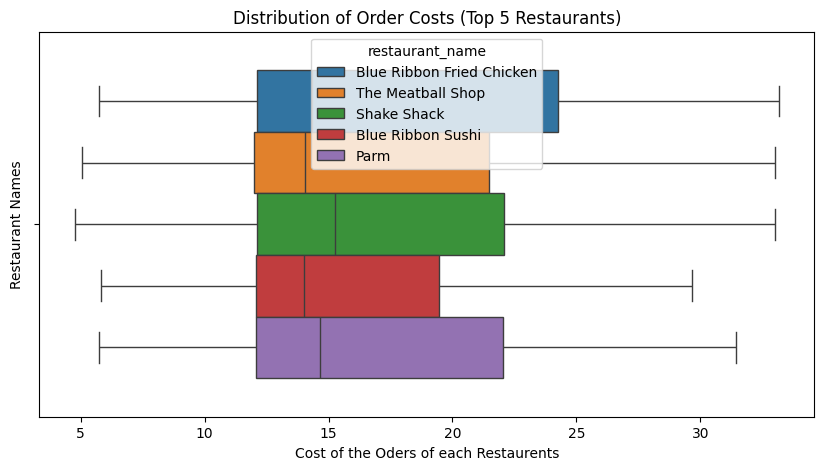

In [ ]:
# Write the code here
top_restaurants = data['restaurant_name'].value_counts().head(5).index.tolist()
top_restaurants_df = data[data['restaurant_name'].isin(top_restaurants)]
# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=top_restaurants_df, x='cost_of_the_order', hue='restaurant_name', showfliers=False)
plt.title('Distribution of Order Costs (Top 5 Restaurants)')
plt.xlabel('Cost of the Oders of each Restaurents')
plt.ylabel('Restaurant Names')
plt.show();

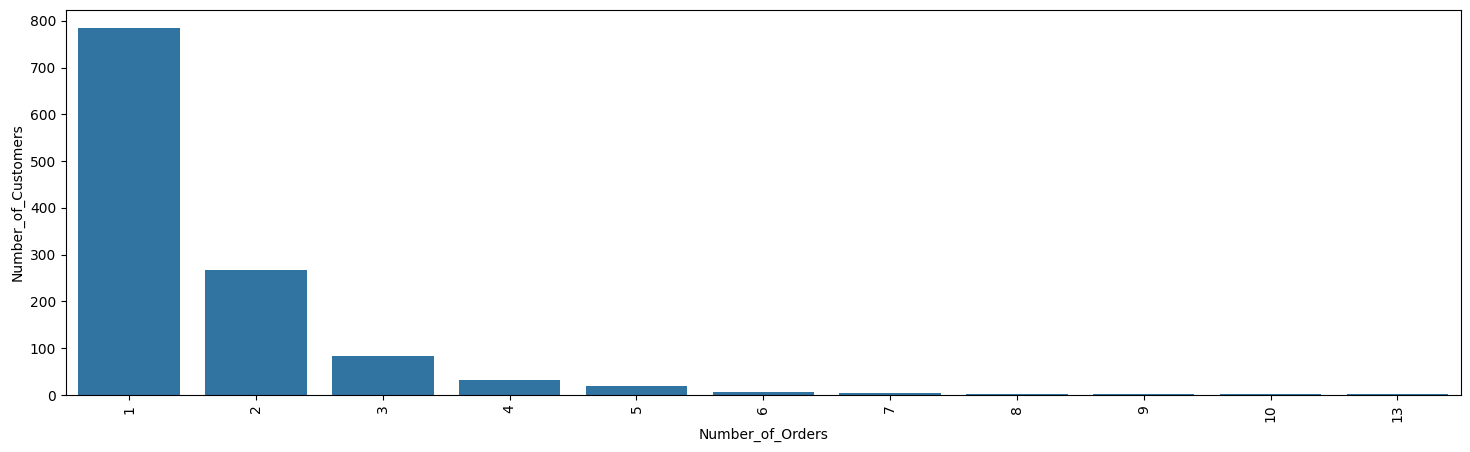

In [ ]:
df = data.copy()
df1 = df['customer_id'].value_counts()
df1 = pd.DataFrame(df1)
#Count plot
plt.figure(figsize=(18,5))
sns.countplot(data=df1, x='count')
plt.xlabel('Number_of_Orders')
plt.ylabel('Number_of_Customers')
plt.xticks(rotation=90);

<Figure size 1000x500 with 0 Axes>

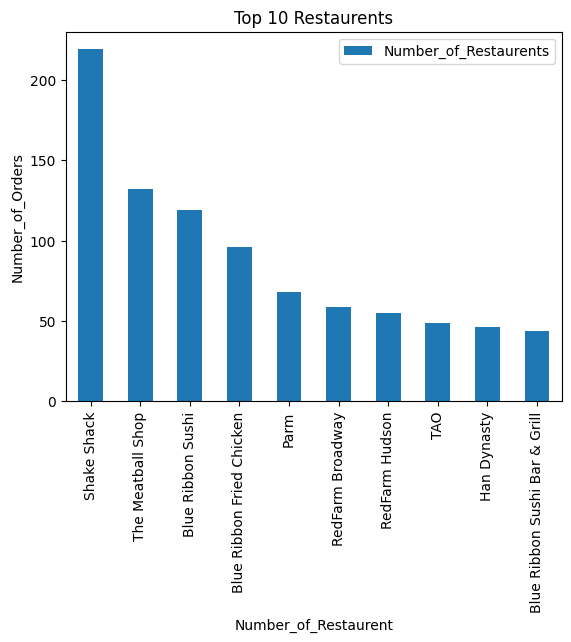

In [ ]:
df = data.copy()
df1 = df.groupby('restaurant_name')['order_id'].count().sort_values(ascending=False).reset_index(name='Number_of_Restaurents')
Restaurent_Count = pd.DataFrame(df1)
Top_10_Restaurent = Restaurent_Count.head(10)
#Bar plot
plt.figure(figsize=(10,5))
Top_10_Restaurent.head(10).plot(kind='bar', x='restaurant_name')
plt.title('Top 10 Restaurents')
plt.xlabel('Number_of_Restaurent')
plt.ylabel('Number_of_Orders')
plt.xticks(rotation=90);

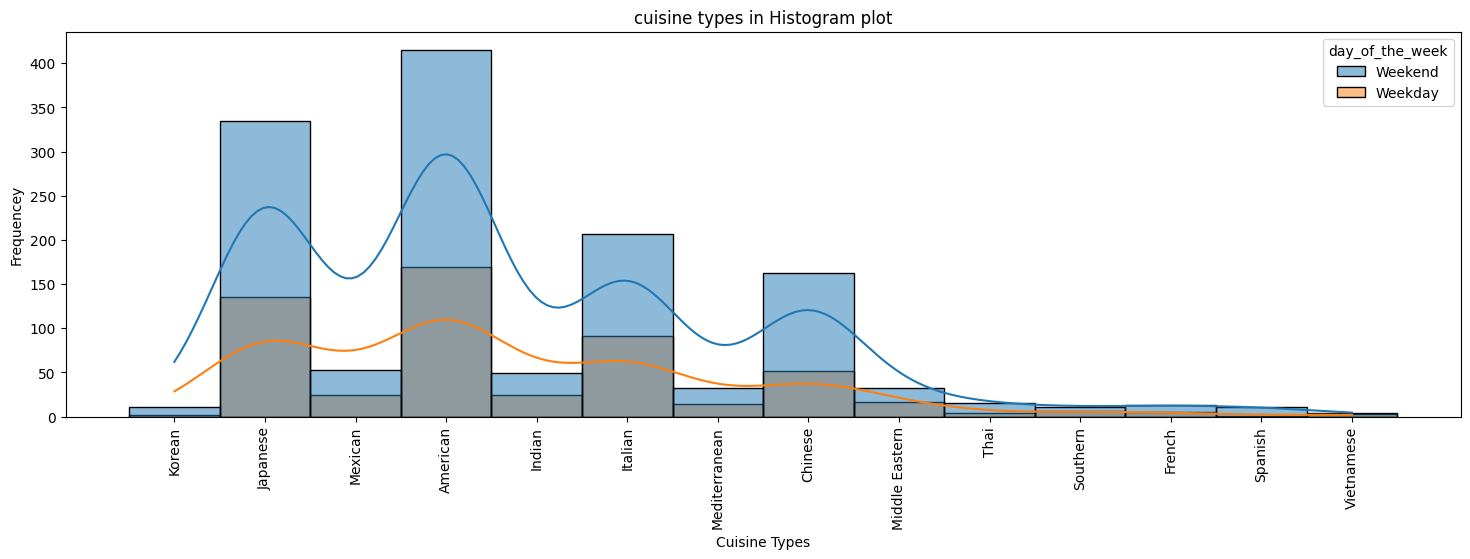

In [ ]:
plt.figure(figsize=(18,5))
#Histplot
sns.histplot(data=data, x='cuisine_type', hue='day_of_the_week', kde=True)
plt.title('cuisine types in Histogram plot')
plt.xlabel('Cuisine Types')
plt.ylabel('Frequencey')
plt.xticks(rotation=90);

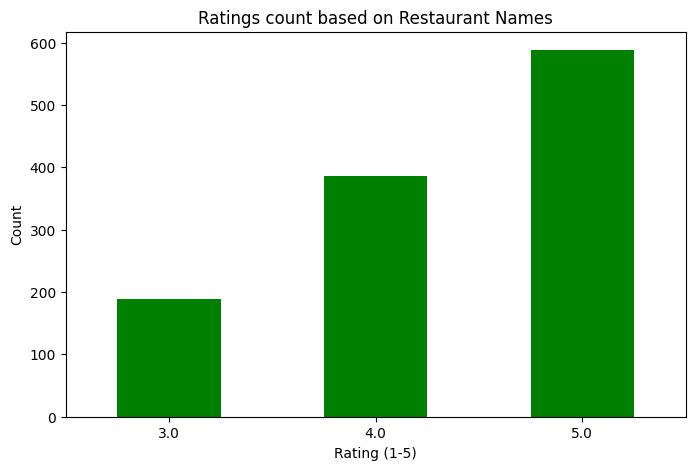

In [ ]:
df = data.copy()
df['rating'] = pd.to_numeric(data.rating, errors='coerce')
df = df.dropna(subset = ['rating'])
plt.figure(figsize=(8, 5))
df['rating'].value_counts().sort_index().plot(kind='bar', color='Green')
plt.title('Ratings count based on Restaurant Names')
plt.xlabel('Rating (1-5)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

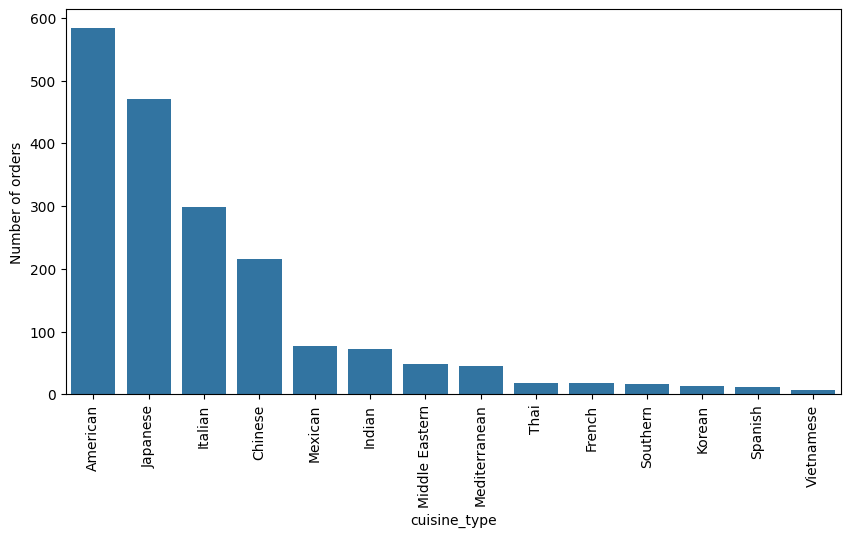

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='cuisine_type', order= data['cuisine_type'].value_counts().index)
plt.xticks(rotation=90)
plt.ylabel('Number of orders')
plt.show()

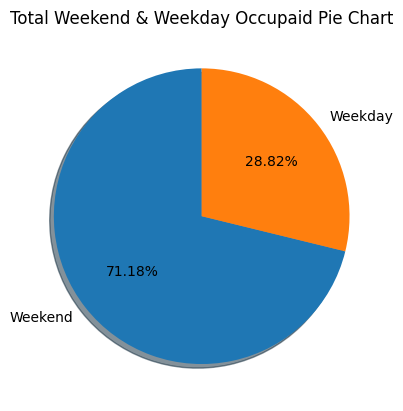

In [ ]:
value_count = data['day_of_the_week'].value_counts()
labels = ['Weekend', 'Weekday']
colors = ['green', 'orange']
#Pie Chart
plt.pie(value_count, labels=labels  ,autopct='%1.2f%%',  shadow=True, startangle=90)
plt.title('Total Weekend & Weekday Occupaid Pie Chart')
plt.show()

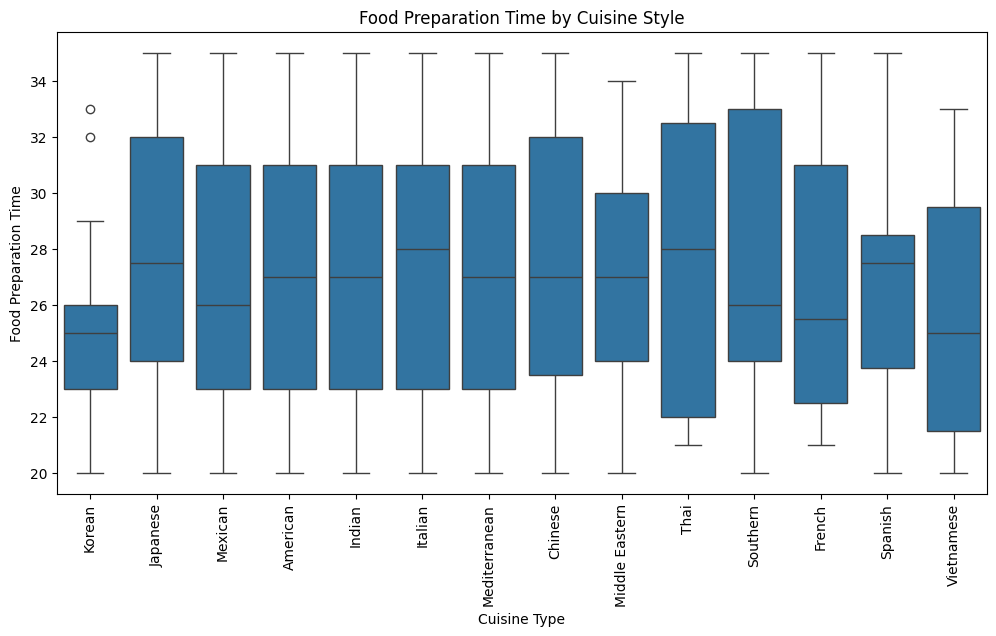

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='cuisine_type', y='food_preparation_time')
plt.title('Food Preparation Time by Cuisine Style')
plt.xlabel('Cuisine Type')
plt.ylabel('Food Preparation Time')
plt.xticks(rotation=90)
plt.show()

#### Observations:

*   Top 5 Restaurant has more orders covered when compared to other Restaurants
*   Most top 2 Customers are Order single or double time only
*   Top 10 Restaurants displayed based on Orders placed in each Customers
*   All Cuisine Type more orders on Weekends only than Weekdays
*   If we ignore 'Not Given' ratings then More number of Restaurants got rating 5 than other ratings like individual of 3 /4.
*   Top 4 Cuisine Types got more orders than other Cuisine Types
*   71.18% of orders are came on only Weekends when compared to Weekdays orders of 28.82%

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
data.groupby('restaurant_name').size().sort_values(ascending=False).head().reset_index(name='Number_Of_Orders')

,restaurant_name,Number_Of_Orders
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


#### Observations:

*   Foodhub Order file contains top 5 restaurants in terms of the number of orders received
    *   **Shake Shack : 219**
    *   **The Meatball Shop : 132**
    *   **Blue Ribbon Sushi : 119**
    *   **Blue Ribbon Fried Chicken	: 96**
    *   **Parm : 68**

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here
data[data['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().head()

,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53


#### Observations:

*   Foodhub Order file contains most popular cuisine on weekends is **American**

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
(len(data[data['cost_of_the_order'] > 20]) / len(data['cost_of_the_order'])) * 100

29.24130663856691

#### Observations:

*   The Percentage of the orders cost more than 20 dollars is **29.24**

### **Question 10**: What is the mean order delivery time? [1 mark]

In [15]:
# Write the code here
print(data['delivery_time'].mean())

24.161749209694417


#### Observations:

*   The mean order delivery time is **24.16**

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
data.groupby('customer_id').size().sort_values(ascending=False).head(3).reset_index(name='Top_CutomerId\'s')

,customer_id,Top_CutomerId's
0,52832,13
1,47440,10
2,83287,9


#### Observations:

*   Most **top 3** frequent customers id's based on their Number of orders they placed are below:
    *   52832
    *   47440
    *   83287

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


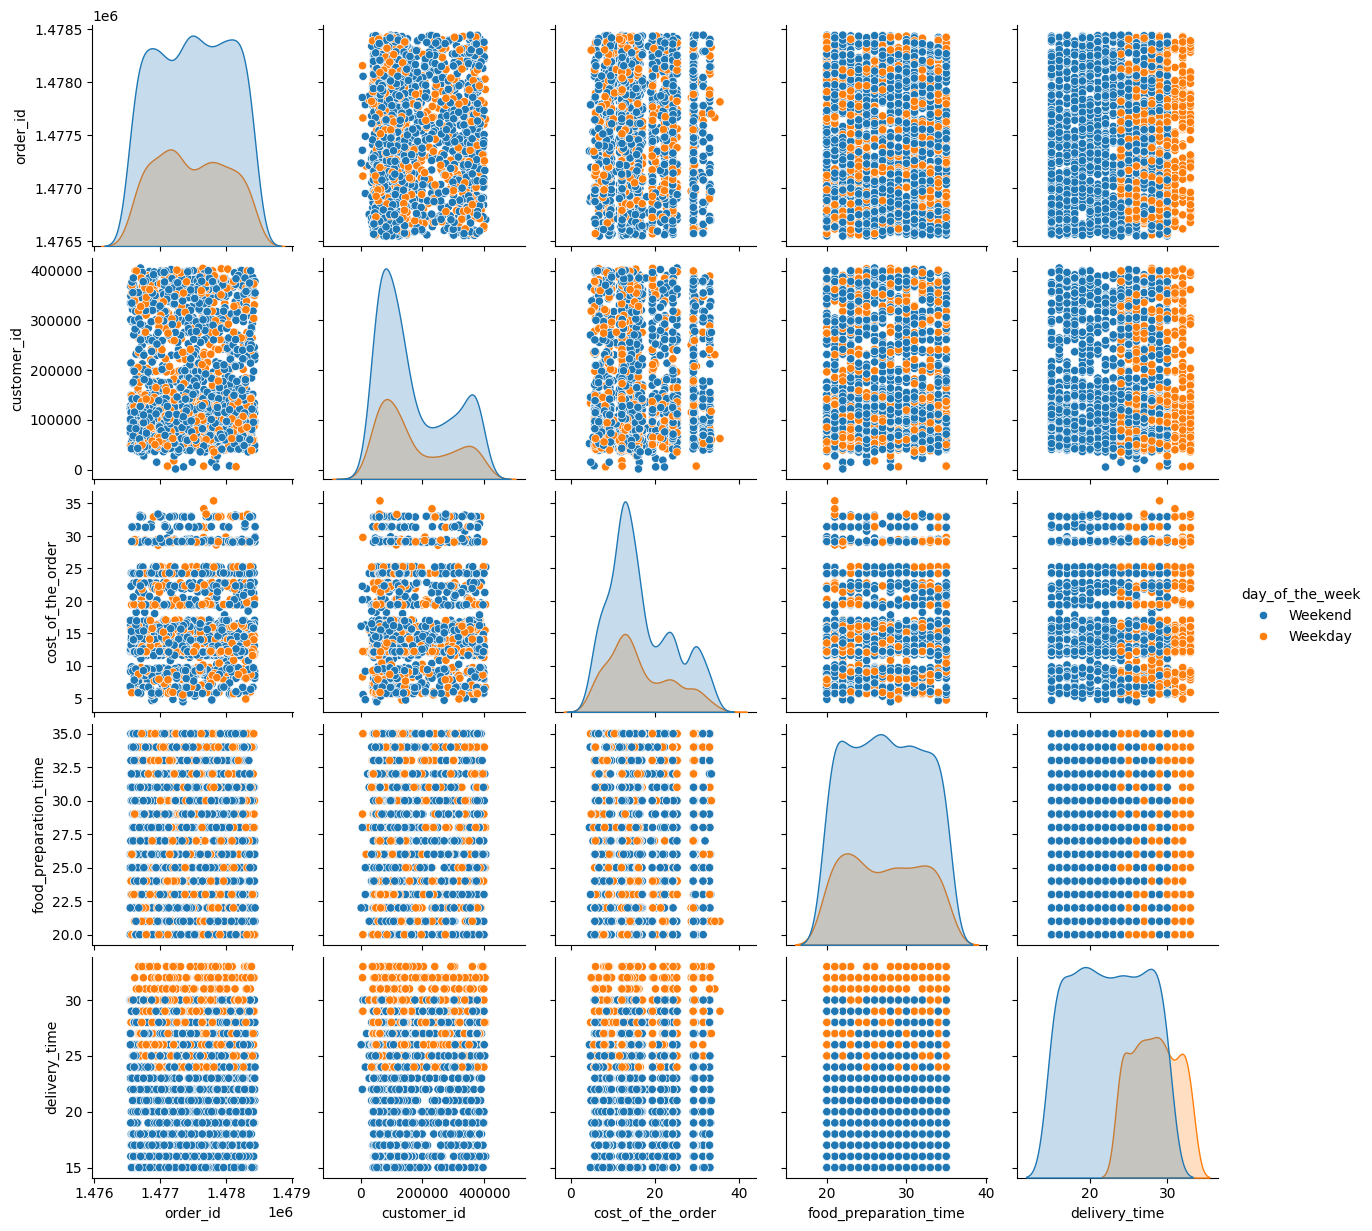

In [ ]:
# Write the code here
#Pariplot
sns.pairplot(data=data, hue='day_of_the_week')

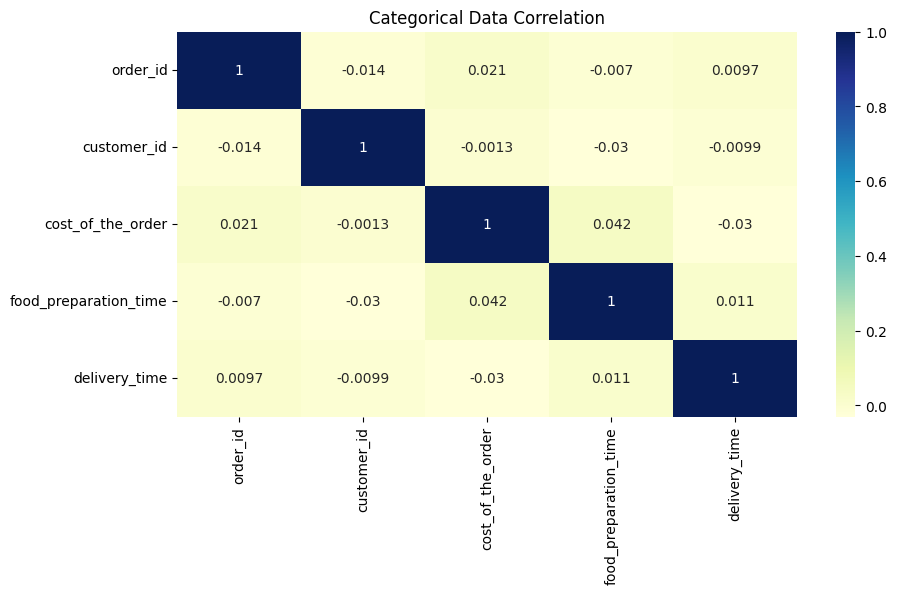

In [ ]:
df = data.copy()
plt.figure(figsize=(10, 5))
numerical_cols = ['order_id','customer_id','cost_of_the_order', 'food_preparation_time', 'delivery_time']
#Heatmap
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='YlGnBu')
plt.title('Categorical Data Correlation')
plt.show()

There is **no Positive / Negitive** correlation between below columns, only **Neutral** correlation exist
**'order_id','customer_id','cost_of_the_order', 'food_preparation_time', 'delivery_time'**

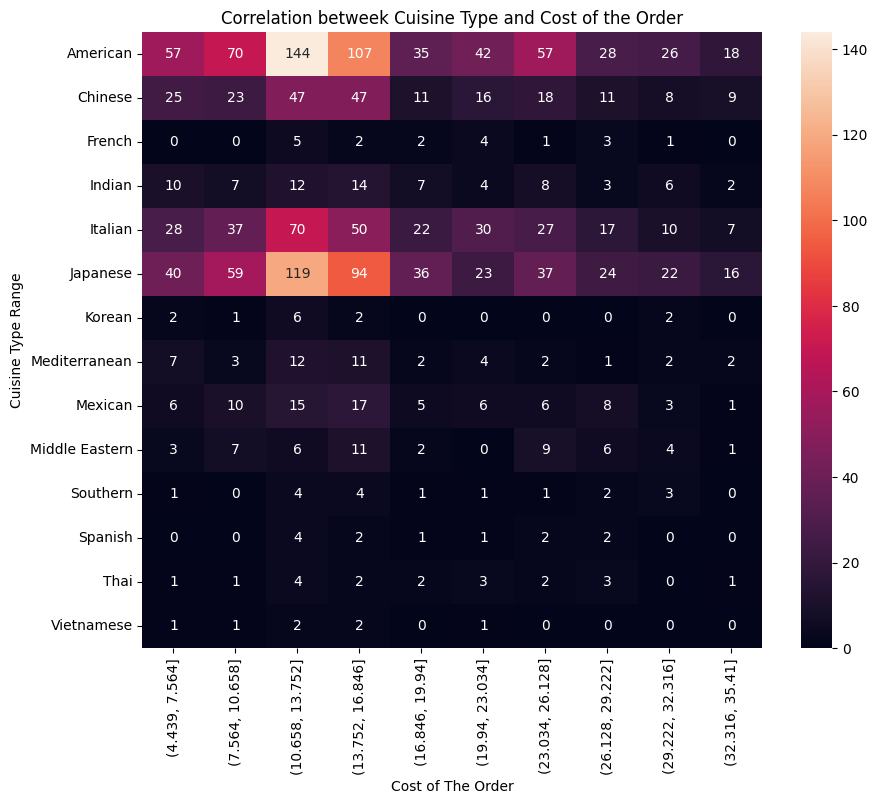

In [20]:
plt.figure(figsize=(10, 8))
cross_tab = pd.crosstab(data['cuisine_type'], pd.cut(data['cost_of_the_order'], bins=10))
cross_tab
sns.heatmap(cross_tab, annot=True, fmt='d')
plt.title('Correlation betweek Cuisine Type and Cost of the Order')
plt.xlabel('Cost of The Order')
plt.ylabel('Cuisine Type Range')
plt.show()

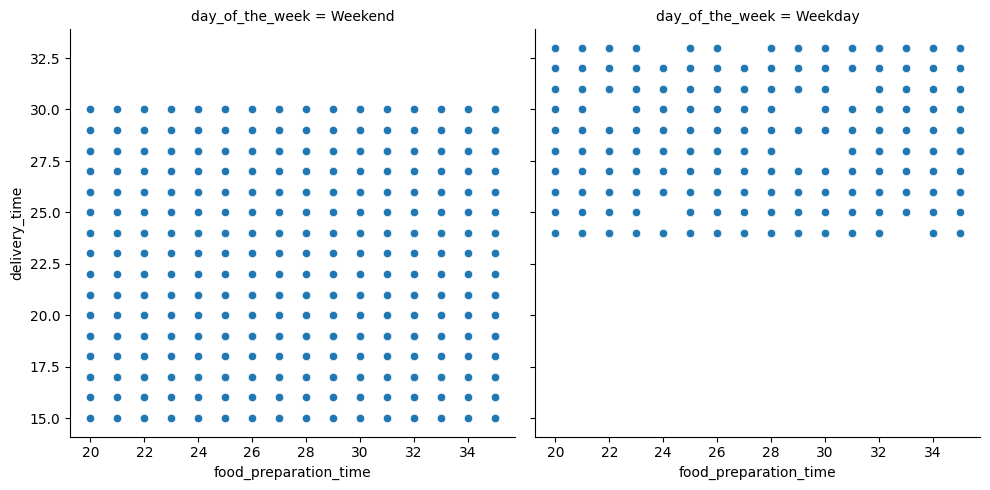

In [ ]:
sns.relplot(data=df, x='food_preparation_time', y='delivery_time',col='day_of_the_week', kind='scatter')

#### Observations:

In **Foodhub Order** dataset as i observed, there is **no Positive or Negative Correlation** exist, only **Neutral** Correlation exist in applied columns.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here
df = data.copy()
df['rating'] = pd.to_numeric(data.rating, errors='coerce')
df = df.dropna(subset = ['rating'])
Avg_rating = df.groupby(['restaurant_name'])['rating'].mean().reset_index(name='Avg_Rating')
Total_Count = df.groupby(['restaurant_name'])['rating'].count().reset_index(name='Total_Count_Rating')
Pramotional_data = pd.merge(Avg_rating, Total_Count, on='restaurant_name')
Pramotional_data[(Pramotional_data.Avg_Rating > 4) & (Pramotional_data.Total_Count_Rating > 50)]

,restaurant_name,Avg_Rating,Total_Count_Rating
16,Blue Ribbon Fried Chicken,4.328125,64
17,Blue Ribbon Sushi,4.219178,73
117,Shake Shack,4.278195,133
132,The Meatball Shop,4.511905,84


#### Observations:

The Restaurents to meet the criteria of the restaurants must have a **rating count of more than 50** and the **average rating should be greater than 4** those restaurants fulfilling the criteria to get the **promotional offer** are below:

*   Blue Ribbon Fried Chicken
*   Blue Ribbon Sushi
*   Shake Shack
*   The Meatball Shop


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [14]:
# Write the code here
data.head()
cost_20_above = data[data.cost_of_the_order > 20]['cost_of_the_order'].sum() * 0.25
cost_5_above = data[(data.cost_of_the_order <= 20) & (data.cost_of_the_order > 5)]['cost_of_the_order'].sum() * 0.15
total_revenue = cost_20_above + cost_5_above
print(total_revenue)

6166.303


#### Observations:

**6166.303** the net revenue generated by the company across all orders

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [16]:
# Write the code here
data['total_time'] = data.food_preparation_time + data.delivery_time
len(data[data['total_time']>60]) / len(data) * 100

10.537407797681771

#### Observations:

**10.53%** of orders take more than 60 minutes to get delivered from the time the order is placed

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [18]:
# Write the code here
df = data.copy()
df = data.groupby(data.day_of_the_week)['delivery_time'].mean()
print(df.Weekday - df.Weekend)

5.870014357297798


#### Observations:

**5.87** the mean delivery time vary during weekdays and weekends

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Top 3 cuisines most regularlu in the dataset are American, Japanese, and Italian --> indicating high demand.
*   Indian, Mexican, and Chinese cuisines also show significant representation, suggesting a diverse customer preference.
*   A most of orders have "Not given" ratings, which could indicate a lack of customer engagement or feedback collection.
*   Orders are distributed across weekdays and weekends, with some cuisines performing better on specific days. For example, American and Japanese cuisines are more popular on weekends than weekdays.

### Recommendations:

*   Offer weekday promotions like happy hours at evenings/Thank God Monday for cuisines that are less ordered during weekdays to balance demand.
*   Address recurring issues in orders with low ratings (e.g., incorrect orders, late deliveries) by providing training or feedback to restaurants.
*   Offer accureate delivery updates to manage customer expectations.
*   Implement incentives (e.g., discounts, loyalty points) for customers to leave ratings and reviews. This will provide more data to identify strengths and areas for improvement.
*   For cuisines with lower ratings (e.g., some Italian or American dishes), work with restaurants to address quality or service issues.
*   Use customer order history and ratings to personalize recommendations, improving user experience and satisfaction.

To implementing these recommendations, the business can enhance customer satisfaction, optimize operations, and drive growth.